# Model prep

This notebook prepares some of the data for modelling.

# Imports

## Modules

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
%matplotlib inline

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

## Data

In [4]:
divide_data = pd.read_pickle('../data/CLEANED_df.pkl')
divide_data.head()

,reading_score,math_score,comp_pct,broadband_pct,poverty_ratio,white_pct,college_pct,median_income,median_rent,unemployment_pct,home_lang_not_eng,disability_pct,composite_score
LEAID,,,,,,,,,,,,,
0102650,48,48,81.2,72.9,16.5,89.2,83.4,48161,750,7.8,3.0,18.4,48.0
0102670,17,15,55.9,46.2,49.0,29.9,78.1,23561,574,12.3,1.4,25.2,16.0
0102700,41,43,83.5,68.1,32.3,49.4,84.2,40218,825,9.2,4.9,16.6,42.0
0102730,37,29,72.9,62.8,29.4,56.0,80.6,37458,456,10.6,4.3,24.5,33.0
0102760,48,53,81.5,70.5,27.9,88.8,82.8,36306,492,7.3,1.4,23.7,50.5


In [5]:
divide_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9988 entries, 0102650 to 5502880
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reading_score      9988 non-null   int64  
 1   math_score         9988 non-null   int64  
 2   comp_pct           9988 non-null   float64
 3   broadband_pct      9988 non-null   float64
 4   poverty_ratio      9988 non-null   float64
 5   white_pct          9988 non-null   float64
 6   college_pct        9988 non-null   float64
 7   median_income      9988 non-null   int64  
 8   median_rent        9988 non-null   int64  
 9   unemployment_pct   9988 non-null   float64
 10  home_lang_not_eng  9988 non-null   float64
 11  disability_pct     9988 non-null   float64
 12  composite_score    9988 non-null   float64
dtypes: float64(9), int64(4)
memory usage: 1.1+ MB


In [6]:
train_set, test_set = train_test_split(divide_data, test_size=0.2, random_state=31)

In [56]:
dd_test = test_set.copy()

In [7]:
digital_divide = train_set.copy()

In [8]:
divide_labels = digital_divide['composite_score']
divide = digital_divide.drop(['reading_score','math_score','composite_score'],axis=1)

In [53]:
divide.columns

Index(['comp_pct', 'broadband_pct', 'poverty_ratio', 'white_pct',
       'college_pct', 'median_income', 'median_rent', 'unemployment_pct',
       'home_lang_not_eng', 'disability_pct'],
      dtype='object')

In [9]:
num_pipeline = Pipeline([
    ##Eventually add imputer
    ##Eventually add feature engineering functions
    ('std_scaler', StandardScaler())
])

In [10]:
num_attribs = list(divide)
## cat_attibs = []

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs)
    ##('cat', cat_pipeline[OneHotEncoder()], cat_attribs)
])

In [11]:
divide_prepped = full_pipeline.fit_transform(divide)

# Linear Regression

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(divide_prepped, divide_labels)

LinearRegression()

In [15]:
lin_reg_predictions = lin_reg.predict(divide_prepped)
print(lin_reg_predictions)
print(divide_labels)
error = mean_squared_error(divide_labels, lin_reg_predictions)
pre_err = np.sqrt(error)
RMSE = pre_err

[51.12871257 55.34207479 43.49517234 ... 49.80034032 52.40252435
 50.0721725 ]
LEAID
2623490    32.5
3621930    59.5
1302430    39.5
5401170    37.5
4900142    45.5
           ... 
3626430    53.0
0103450    41.5
0643560    42.0
2723550    65.0
3100122    57.5
Name: composite_score, Length: 7990, dtype: float64


In [16]:
print(RMSE)

12.858917422236514


## Model Performance Evaluation

## Linear Regression Feature Importance

Feature: 0, Score: -2.64448
Feature: 1, Score: 3.61820
Feature: 2, Score: -2.02197
Feature: 3, Score: 2.16448
Feature: 4, Score: 0.99059
Feature: 5, Score: -0.20056
Feature: 6, Score: 0.04197
Feature: 7, Score: -0.81239
Feature: 8, Score: -0.35061
Feature: 9, Score: -1.95392


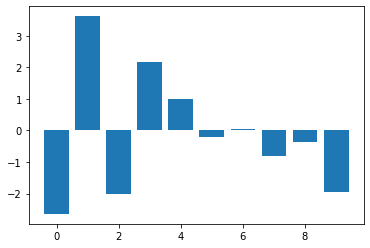

In [30]:
importance = lin_reg.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Decision Tree Regressor

In [23]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(divide_prepped, divide_labels)

DecisionTreeRegressor()

In [24]:
dt_predictions = dt_reg.predict(divide_prepped)
print(dt_predictions)
print(divide_labels)
RMSE_dt = np.sqrt(
    mean_squared_error(divide_labels, dt_predictions))
print(RMSE_dt)

[32.5 59.5 39.5 ... 42.  65.  57.5]
LEAID
2623490    32.5
3621930    59.5
1302430    39.5
5401170    37.5
4900142    45.5
           ... 
3626430    53.0
0103450    41.5
0643560    42.0
2723550    65.0
3100122    57.5
Name: composite_score, Length: 7990, dtype: float64
0.0


## Model Performance Evaluation

## Feature Importance

In [54]:
def plot_feature_importances(model):
    n_features = divide_prepped.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), divide.columns)
    plt.xlabel('Feature Importance')
    plt.ylabel("Feature")
    

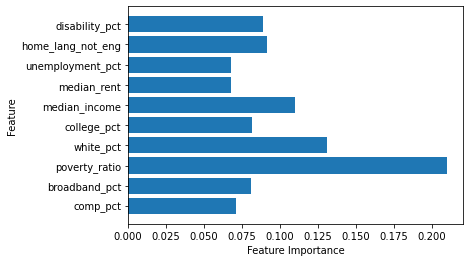

In [55]:
plot_feature_importances(dt_reg)

Feature: 0, Score: 0.07112
Feature: 1, Score: 0.08111
Feature: 2, Score: 0.21006
Feature: 3, Score: 0.13118
Feature: 4, Score: 0.08136
Feature: 5, Score: 0.10994
Feature: 6, Score: 0.06755
Feature: 7, Score: 0.06765
Feature: 8, Score: 0.09112
Feature: 9, Score: 0.08891


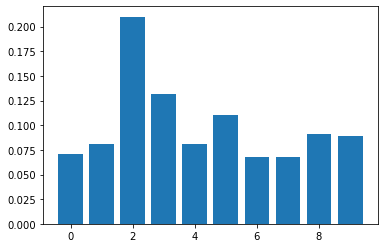

In [31]:
dt_importance = dt_reg.feature_importances_
for i,v in enumerate(dt_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(dt_importance))], dt_importance)
plt.show()

# Random Forest Regressor

In [33]:
rf_reg = RandomForestRegressor()
rf_reg.fit(divide_prepped, divide_labels)

RandomForestRegressor()

In [34]:
rf_predictions = rf_reg.predict(divide_prepped)
print(rf_predictions)
print(divide_labels)
RMSE_rf = np.sqrt(
    mean_squared_error(divide_labels, rf_predictions))

print(RMSE_rf)

[43.115 57.72  40.24  ... 43.095 61.665 54.33 ]
LEAID
2623490    32.5
3621930    59.5
1302430    39.5
5401170    37.5
4900142    45.5
           ... 
3626430    53.0
0103450    41.5
0643560    42.0
2723550    65.0
3100122    57.5
Name: composite_score, Length: 7990, dtype: float64
4.762796103882566


In [40]:
rf_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [43]:
rf_reg.get_support()

AttributeError: 'RandomForestRegressor' object has no attribute 'get_support'

In [ ]:
def plot_feature_importances(model):
    n_features = 

In [41]:
from sklearn.feature_extraction import DictVectorizer

Feature: 0, Score: -2.64448
Feature: 1, Score: 3.61820
Feature: 2, Score: -2.02197
Feature: 3, Score: 2.16448
Feature: 4, Score: 0.99059
Feature: 5, Score: -0.20056
Feature: 6, Score: 0.04197
Feature: 7, Score: -0.81239
Feature: 8, Score: -0.35061
Feature: 9, Score: -1.95392


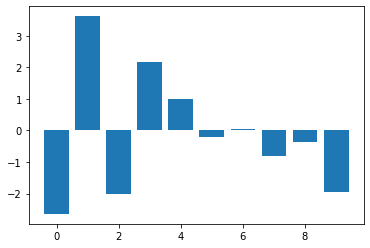

In [37]:
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

# CART Algorithm

# Model Evaluation